<a href="https://colab.research.google.com/github/DeuklyoungKo/MakeYourFirstGANWithPyTorch/blob/main/ch07_01_handwritingDiscriminator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import pandas,random, numpy
import matplotlib.pyplot as plt

## 판별기

In [8]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()

    # 신경망 레이어 정의  
    self.model = nn.Sequential(
        nn.Linear(784, 200),
        nn.Sigmoid(),
        nn.Linear(200, 1),
        nn.Sigmoid()
    )

    # 손실함수 설정
    self.loss_function = nn.MSELoss()

    # SGD 옵티마이저 설정
    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

    # 진행 측정을 위한 변수 초기화
    self.counter = 0;
    self.progress = []

    pass

  def forward(self, inputs):
    #모델 실행
    return self.model(inputs)

  def train(self, inputs, targets):
    # 신경망 출력 계산
    outputs = self.forward(inputs)

    # 손실 계산
    loss = self.loss_function(outputs, targets)

    # 카운터를 증가시키고 10회마다 오차 저장
    self.counter += 1;
    if (self.counter % 10 == 0):
      self.progress.append(loss.item())
      pass
    if (self.counter % 10000 == 0):
      print("counter = ", self.counter)
      pass

    # 기울기를 초기화하고 역전파 후 가중치 갱신
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()
    pass

  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
    pass
  
#노이즈 만들기
def generate_random(size):
  random_data = torch.rand(size)
  return random_data

In [5]:
class MnistDataset(Dataset):
  def __init__(self, csv_file):
    self.data_df = pandas.read_csv(csv_file, header=None)
    pass

  def __len__(self):
    return len(self.data_df)

  def __getitem__(self, index):
    label = self.data_df.iloc[index,0]
    target = torch.zeros((10))
    target[label] = 1.0

    image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
    return label, image_values, target

  def plot_image(self, index):
    img = self.data_df.iloc[index,1:].values.reshape(28,28)
    plt.title("label = " + str(self.data_df.iloc[index,0]))
    plt.imshow(img, interpolation='none', cmap='Blues')
    pass
  
  pass

## 데이터 셋 설정 및 확인

Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).


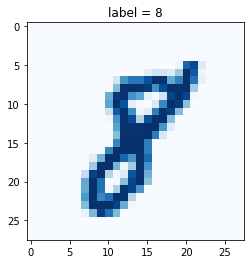

In [9]:
from google.colab import drive
drive.mount('./mount')

mnist_dataset = MnistDataset('mount/My Drive/Colab Notebooks/Deep Learning/MakeYourFirstGANWithPyTorch/mnist_data/mnist_train.csv')
mnist_dataset.plot_image(17)


## 판별기 테스트

In [11]:
D = Discriminator()

for lbel, image_data_tensor, target_tensor in mnist_dataset:
  # 실제 데이터
  D.train(image_data_tensor, torch.FloatTensor([1.0]))
  # 생성된 데이터
  D.train(generate_random(784), torch.FloatTensor([0.0]))
  pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000


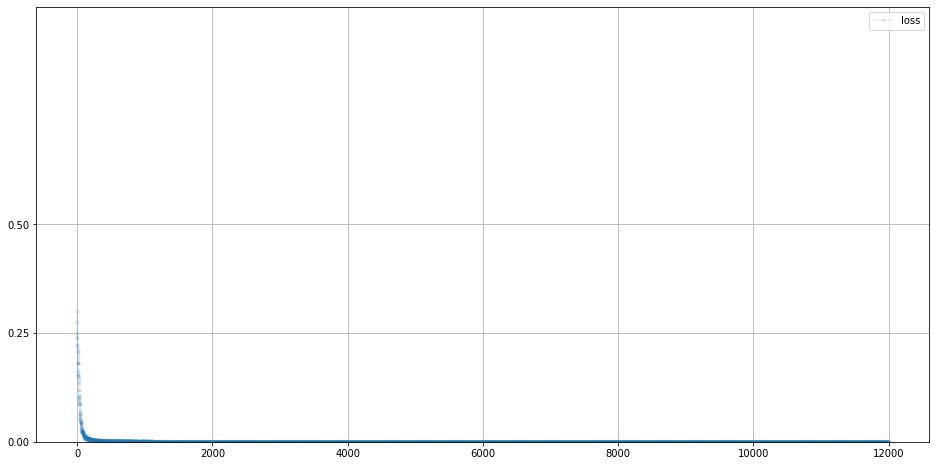

In [12]:
D.plot_progress()

In [14]:
for i in range(4):
  image_data_tensor = mnist_dataset[random.randint(0,60000)][1]
  print(D.forward(image_data_tensor).item())
  pass

for i in range(4):
  print(D.forward(generate_random(784)).item())
  pass

0.9953712821006775
0.9975610971450806
0.9930189251899719
0.9944948554039001
0.006215145345777273
0.005425875075161457
0.004705126862972975
0.006378663703799248
